In [1]:
import zipfile
import shutil
import numpy as np
import matplotlib.pyplot as plt
# sphinx_gallery_thumbnail_path = '_static/playback-thumbnail.png'

import librosa
import librosa.display

# We'll need IPython.display's Audio widget
from IPython.display import Audio

# We'll also use `mir_eval` to synthesize a signal for us
import mir_eval.sonify

import csv
import os
import json



In [2]:
## paths

audio_fpath = 'processed_audio/'
audio_clips = os.listdir(audio_fpath)


In [5]:


x, sr = librosa.load(audio_fpath+audio_clips[2], sr=44100)

print(type(x), type(sr))
print(x.shape, sr)



<class 'numpy.ndarray'> <class 'int'>
(144000,) 44100


In [28]:
# plt.figure(figsize=(14, 5))
# librosa.display.waveshow(x, sr=sr)

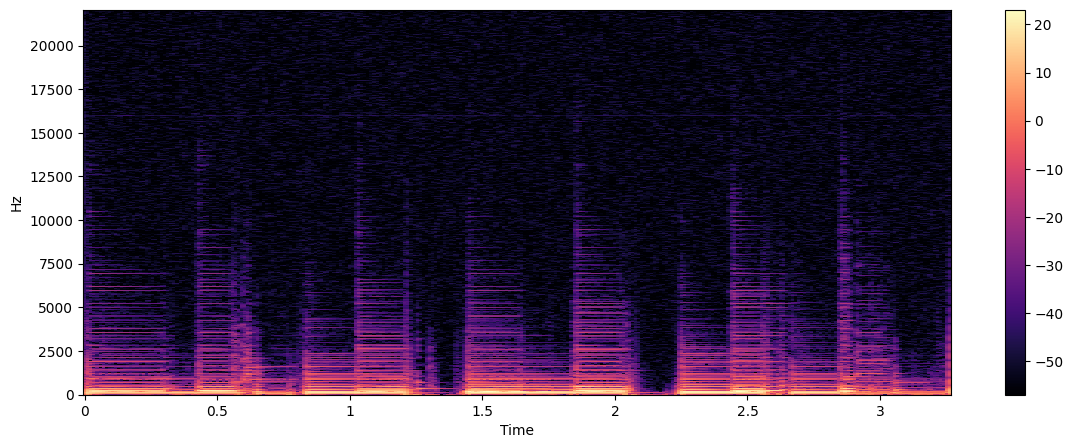

In [10]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()



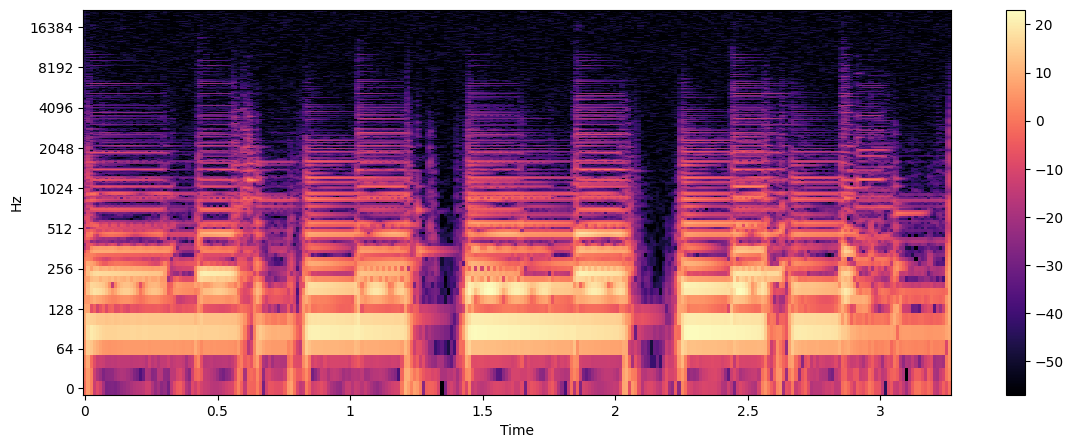

In [23]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.savefig('teste.png')

plt.colorbar()


In [31]:
spec = np.abs(librosa.stft(X, hop_length=512))
spec = librosa.amplitude_to_db(spec, ref=np.max)


mel_spect = librosa.feature.melspectrogram(y=X, sr=sr, n_fft=2048, hop_length=1024)
mel_spect = librosa.power_to_db(spec, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram');
plt.colorbar(format='%+2.0f dB');

ParameterError: Audio data must be floating-point

In [3]:
def to_spectogram(audio_fpath, output, count = 500):
    audio_clips = os.listdir(audio_fpath)

    available = os.listdir('spectogram/')
    available  = [i.replace('.png', '.wav') for i in available]

    not_processed = [i for i in audio_clips if i not in available]

    iter = 0
    for i in not_processed:
        if iter == count:
            break

        x, sr = librosa.load(audio_fpath + i, sr=44100)
        X = librosa.stft(x)
        Xdb = librosa.amplitude_to_db(abs(X))
        librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
        plt.savefig( output +  i[:-3] + 'png', dpi = 96)
        iter +=1

        if iter%50 ==0:
            text = f'Total de:{ str(iter)}/{len(not_processed)} espectogramas gerados'
            print(text)
        

KeyboardInterrupt: 

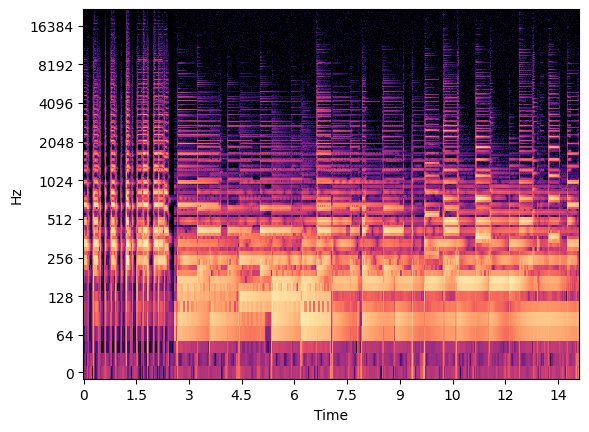

In [6]:
# 67 min - 126 imagens
to_spectogram(audio_fpath, output = 'spectogram/', count = 100)